In [130]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats('svg')

import time


## 3.5.1 Reading the Dataset

In [42]:
trans = transforms.ToTensor()
train_data = torchvision.datasets.FashionMNIST(root='../data/', train=True, transform=trans, target_transform=None, download=True)
test_data = torchvision.datasets.FashionMNIST(root='../data/', train=False, transform=trans, target_transform=None)

In [43]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [44]:
len(train_data), len(test_data)

(60000, 10000)

In [45]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [46]:
train_data[0][0].shape, train_data[0][0].dtype

(torch.Size([1, 28, 28]), torch.float32)

In [47]:
train_data[0][1], train_data[0][1], type(train_data[0][1])

(9, 9, int)

In [73]:
def get_text_label(idxs):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[idx] for idx in idxs]

In [127]:
def show_fashion_mnist(images, labels):
    assert len(images) == len(labels)
    fig, axes = plt.subplots(2, 5, figsize=(5, 5))
#     print(axes.reshape(-1))
#     for i in range(len(images)):
#         axes[i].imshow(images[i].numpy())
#         axes
    for axis, img, label in zip(axes.reshape(-1), images, labels):
#         print(axis)
#         print(img.shape)
#         print(label)
        axis.imshow(img.reshape(28, 28).numpy())
        axis.set_title(label)
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)

In [128]:
# type(train_data)
# enumerate(train_data)
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=False)

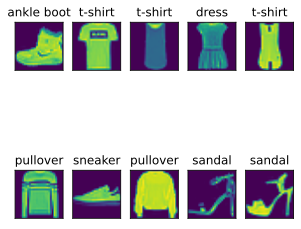

In [129]:
# enumerate(train_loader)[0]
for idx, batch in enumerate(train_loader):
#     print(batch[0].shape)
    labels = get_text_label(batch[1])
    show_fashion_mnist(batch[0], labels)
    break

## Reading a Minibatch

In [131]:
batch_size = 256
num_workers = 4
start = time.time()
train_iter = DataLoader(train_data, batch_size, shuffle=True, num_workers=num_workers)
time.time() - start

0.00030922889709472656